In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
from reliability.Fitters import Fit_Everything
from reliability.Distributions import Weibull_Distribution
from reliability.Other_functions import make_right_censored_data
from reliability.Distributions import Lognormal_Distribution, Gamma_Distribution,Weibull_Distribution, Mixture_Model
import matplotlib.pyplot as plt
from reliability.Fitters import Fit_Weibull_Mixture, Fit_Weibull_2P
from reliability.Other_functions import histogram, make_right_censored_data
import numpy as np
import matplotlib.pyplot as plt
degToRad=np.pi/180

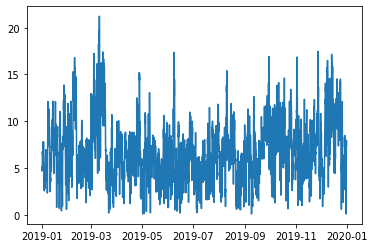

               timestamp  Fruges Wind Speed [100 m]
0    2019-01-01 00:00:00                    4.99163
1    2019-01-01 01:00:00                    4.85099
2    2019-01-01 02:00:00                     4.5797
3    2019-01-01 03:00:00                    4.82336
4    2019-01-01 04:00:00                    5.11909
...                  ...                        ...
8755 2019-12-31 19:00:00                    7.68408
8756 2019-12-31 20:00:00                    7.78712
8757 2019-12-31 21:00:00                     7.4571
8758 2019-12-31 22:00:00                    7.41537
8759 2019-12-31 23:00:00                    7.29728

[8760 rows x 2 columns]
La vitesse moyenne est  6.662763725844598


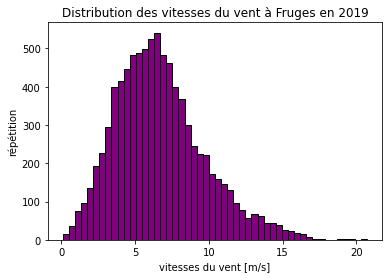

In [2]:
##ORGANISATION ET MODELISATION DES DONNEES POUR FRUGES
headers =['timestamp','Fruges Wind Speed [100 m]','Fruges Wind Direction [100 m]']
df = pd.read_csv('Fruges.csv')

df['timestamp'] = df['timestamp'].map(lambda x: datetime.strptime(str(x), '%Y%m%dT%H%M'))
x = df['timestamp']
y = df['Fruges Wind Speed [100 m]']
### plot
fig2=plt.plot(x,y)
fig2=plt.show()
##CORRECTION DE LA VITESSE DU VENT EN FONCTION DE LA HAUTEUR 100m(mesure) à 84m(eolienne)
WSC = df['Fruges Wind Speed [100 m]']*((np.log(84/0.05))/np.log(100/0.05))
df['Fruges Wind Speed [100 m]']=WSC
del df['Fruges Wind Direction [100 m]']
print(df)
plt.hist(df['Fruges Wind Speed [100 m]'] , bins=50 , color='purple', edgecolor='black' )
plt.xlabel('vitesses du vent [m/s]')
plt.ylabel('répétition')
plt.title('Distribution des vitesses du vent à Fruges en 2019')
Vmoy=(np.mean(WSC))#vitesse moyenne
print('La vitesse moyenne est ',Vmoy)

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 8760/0 (0% right censored) 

  Distribution   Alpha    Beta     Gamma      Mu    Sigma   Lambda  Log-likelihood    AICc     BIC      AD
    Weibull_2P 7.52132   2.338                                            -21790.1 43584.1 43598.3 16.4816
    Weibull_3P 7.48025 2.32338 0.0361584                                  -21789.3 43584.6 43605.9 15.9679
      Gamma_2P 1.50549 4.42565                                            -21830.7 43665.4 43679.5 11.8418
      Gamma_3P 1.50549 4.42565                                            -21830.7 43667.4 43688.6 11.8418
Loglogistic_2P 6.14922 3.55331                                            -22042.7 44089.4 44103.5 28.4478
Loglogistic_3P 6.14922 3.55331         0                                  -22042.7 44091.4 44112.6 28.4478
     Normal_2P                           6.66276  3.01469                 -22096.5 44197.1 44211.2 56.6835
  Lognormal_2P                        

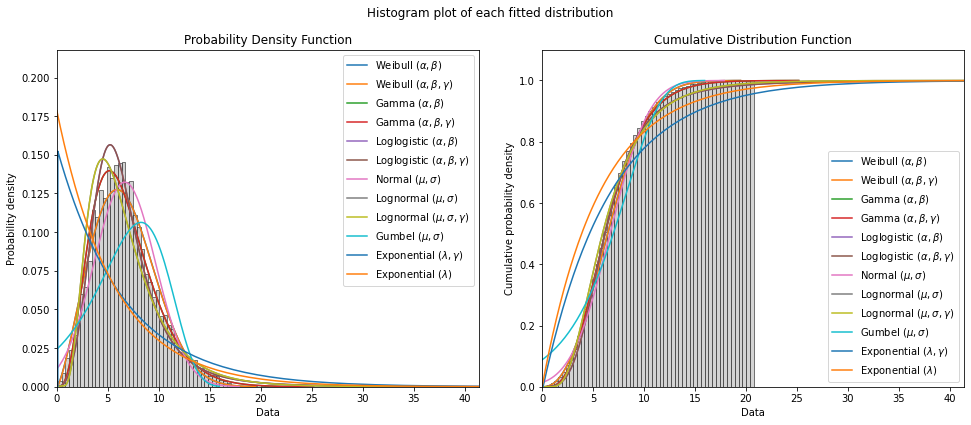

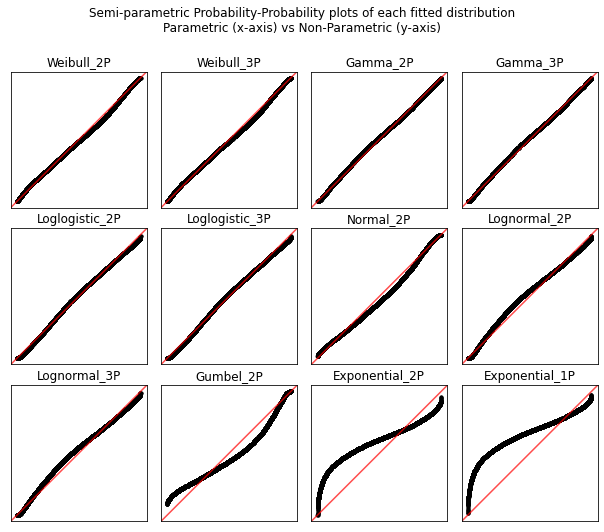

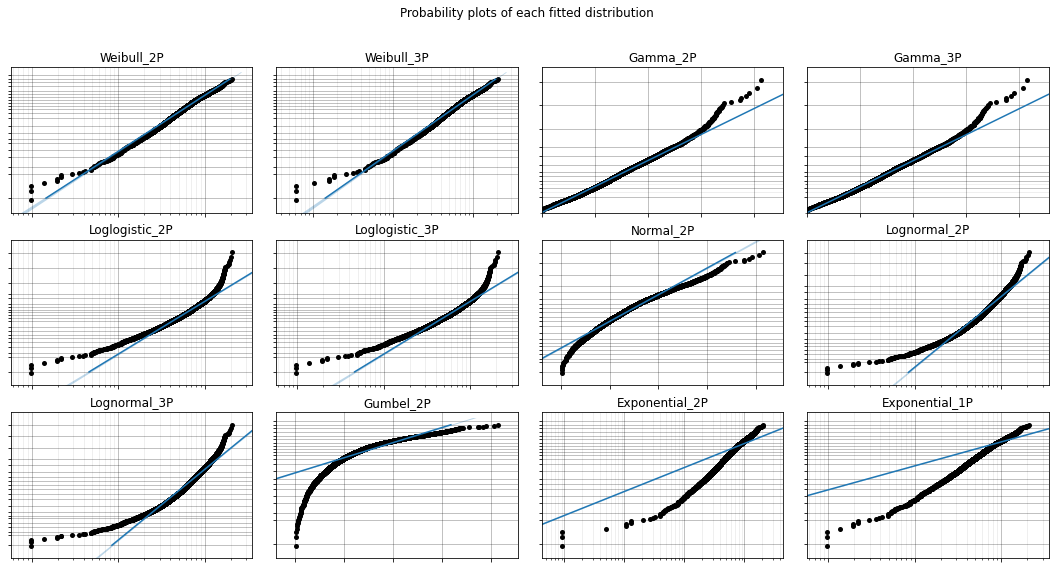

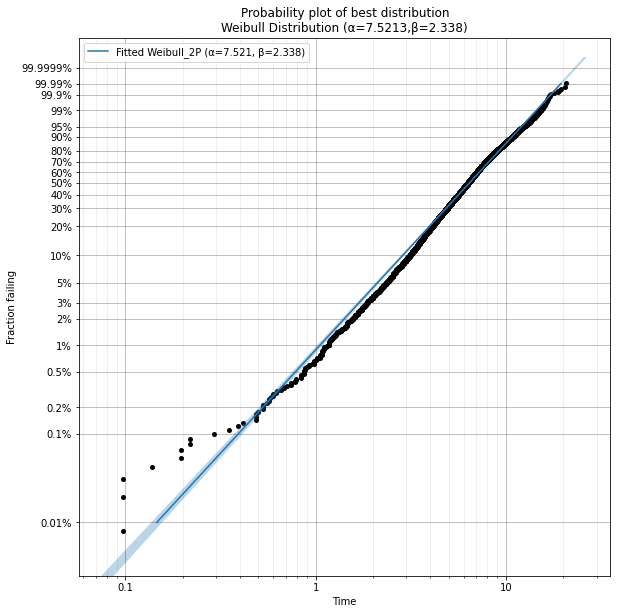

The best fitting distribution was Weibull_2P which had parameters [7.52132011 2.33800357 0.        ]


In [3]:
raw_data = np.asarray(WSC) 
data = make_right_censored_data(raw_data, threshold=25)
results = Fit_Everything(failures=data.failures, right_censored=data.right_censored)
# fit all the models
print('The best fitting distribution was', results.best_distribution_name, 'which had parameters', results.best_distribution.parameters)

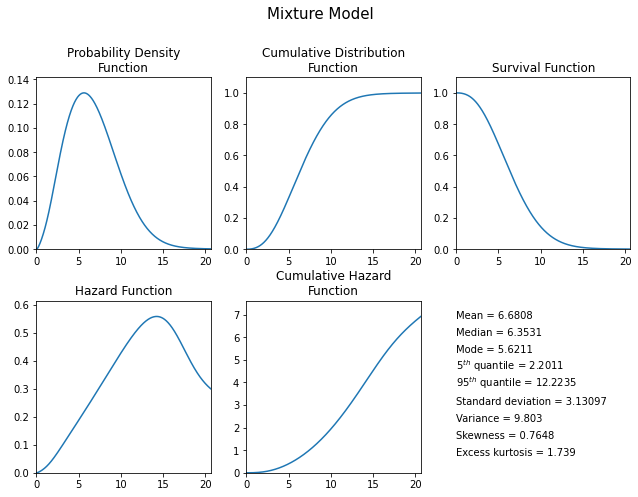

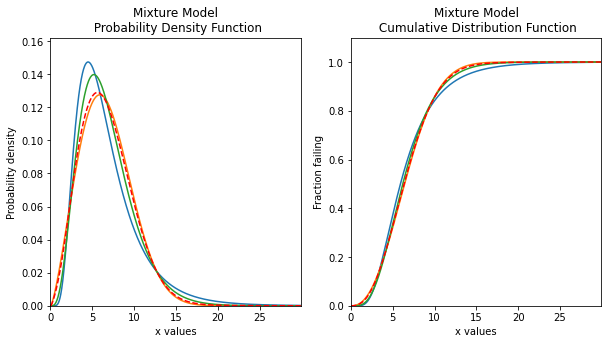

In [4]:

# create the mixture model
d1 = Lognormal_Distribution(mu=1.77932, sigma=0.524176)
d2 = Weibull_Distribution(alpha=7.48025, beta=2.32338, gamma=0.0361584)
d3 = Gamma_Distribution(alpha=1.50549, beta=4.42565, gamma=0.0361584)
mixture_model = Mixture_Model(distributions=[d1, d2, d3], proportions=[0.1, 0.8, 0.1])
# plot the 5 functions using the plot() function
mixture_model.plot()
# plot the PDF and CDF
plot_components = True # this plots the component distributions. Default is False
plt.figure(figsize=(9, 5))
plt.subplot(121)
mixture_model.PDF(plot_components=plot_components, color='red', linestyle='--')
plt.subplot(122)
mixture_model.CDF(plot_components=plot_components, color='red', linestyle='--')
plt.subplots_adjust(left=0.1, right=0.95)
plt.show()


Weibull_Mixture BIC: 43474.37643039292 
Weibull_2P BIC: 43598.270122685


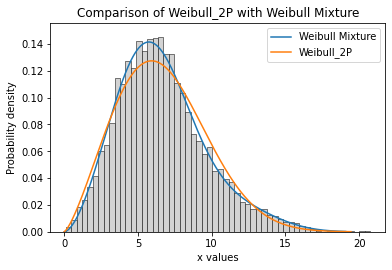

In [5]:

all_data = np.asarray(WSC)
data = make_right_censored_data(all_data, threshold=30)
# fit the Weibull Mixture and Weibull_2P
mixture = Fit_Weibull_Mixture(failures=data.failures, right_censored=data.right_censored, show_probability_plot=False, print_results=False)
single = Fit_Weibull_2P(failures=data.failures, right_censored=data.right_censored,show_probability_plot=False, print_results=False)
print('Weibull_Mixture BIC:', mixture.BIC, '\nWeibull_2P BIC:', single.BIC) # print the goodness of fit measure
# plot the Mixture and Weibull_2P
histogram(all_data, white_above=30)
mixture.distribution.PDF(label='Weibull Mixture')
single.distribution.PDF(label='Weibull_2P')
plt.title('Comparison of Weibull_2P with Weibull Mixture')
plt.legend()
plt.show()


In [6]:
#METHODE FOURNI PAR MONSIEUR THIBAUT MENARD
data= np.loadtxt('NACA0018.txt', skiprows=12)
angle=[col[0]*degToRad for col in data]
print(max(angle), end='')
print("<-------->", end='')
print(min(angle))
print()

cz=[col[1] for col in data]

cx=[col[2] for col in data]

cxf=interp1d(angle,cx)
print(cxf)
print(len(angle))
czf=interp1d(angle,cz)

Vz=15;rmin=0.3;rmax=1.8;Lc=0.2;rho=1.2;Npales=3;avd=30*degToRad;avf=30*degToRad
A=15

1.5969762655748114<-------->0.0

175


-----------------------------------------------------
1.0272002172234465<-------->0.9277686251782588

-----------------------------------------------------
20
-----------------------------------------------------
1.0214889308733084<-------->0.8941188539998953

-----------------------------------------------------
20
-----------------------------------------------------
1.0157793215502218<-------->0.8608147619704417

-----------------------------------------------------
20
-----------------------------------------------------
1.0100717605898928<-------->0.8279236447189001

-----------------------------------------------------
20
-----------------------------------------------------
1.0043666185278712<-------->0.7955075794384111

-----------------------------------------------------
20
-----------------------------------------------------
0.998664264955944<-------->0.7636228846005036

-----------------------------------------------------
20
-----------------------------------------------

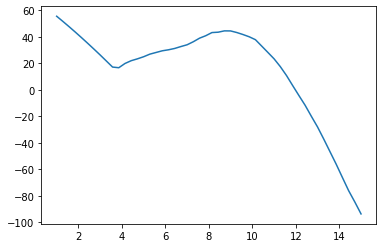

In [11]:
def va(r,ap):
    return np.sqrt(Vz**2+(r*ap)**2)
def beta(r,ap):
    return np.arcsin(Vz/va(r,ap))
def i(r,ap):
    return beta(r,ap)-av(r)
def av(r):
    return avd+(r-rmin)/(rmax-rmin)*(avf-avd)

def f(r,ap):
    anglei=i(r,ap)
        
    anglei = [abs(a) for a in anglei]
    print("-----------------------------------------------------")
    print(max(anglei), end='')
    print("<-------->", end='')
    print(min(anglei))
    print()
    print("-----------------------------------------------------")
    print(len(anglei))
    pb=beta(r,ap)
    term1=-cxf(anglei)*np.cos(pb)
    term2=czf(anglei)*np.sin(pb)
    term3=0.5*rho*va(r,ap)**2*Lc
    return (term1+term2)*term3

def Caero(ap):
    r=np.linspace(rmin,rmax,20)
    y=r*f(r,ap)
    It=np.trapz(y,r)
    return It

def g(ap):
    return Npales*Caero(ap)-A*np.abs(ap)

plt.figure("g")
ap=np.linspace(1,15)
yg=np.array([g(api) for api in ap])
fig1=plt.plot(ap,yg)

vitrot=fsolve(g,2)
print('ap=',ap)
print(vitrot)

In [ ]:
##CALCUL A ET A'


r=np.linspace(rmin,rmax,20)
def sigma(r):
    return Npales*Lc/2*np.pi*r
#C1=czf(anglei)*np.sin(pb)-cxf(anglei)*np.cos(pb)
def C1(r,ap):
    anglei=i(r,ap)
    pb=beta(r,ap)
    term1=-cxf(anglei)*np.cos(pb)
    term2=czf(anglei)*np.sin(pb)    
    return (term1+term2)

#C2=czf(anglei)*np.cos(pb)+cxf(anglei)*np.sin(pb)
def C2(r,ap):
    anglei=i(r,ap)
    pb=beta(r,ap)
    term1=cxf(anglei)*np.sin(pb)
    term2=czf(anglei)*np.cos(pb)    
    return (term1+term2)



def A1(r,ap):
     #anglei=i(r,ap)
     pb=beta(r,ap)
     term1=(2*np.sin(pb))**2
     term2=sigma(r)*C2(r,ap)
     return 1/((term1/term2)+1)
    
def A2(r,ap): 
     #anglei=i(r,ap)
     pb=beta(r,ap)
     return 1/(((4*np.sin(pb)*np.cos(pb)*(r,ap))/sigma(r)*C1(r,ap))-1)
print('a=',A1,'et a1=',A2)